# Build Instagram recommendation system to recommend users related post.(Codelabz)


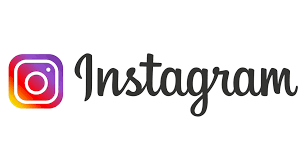

# Objective: -



The goal is to make a prototype of instagram recommendation system for the real Scorelabs

The post you see as a suggested post on Instagram when you scroll through your feed is where Instagram uses a recommendation system to recommend posts that may interest you.

Instagram also use a recommender system to suggest more accounts to follow, but here I will take you through how the recommender system of Instagram recommends more posts.

The suggested posts you see on Instagram are recommended based on your activities on Instagram, such as:

1. What kind of accounts do you follow, and what kind of posts do you engage with
2. The caption of the posts that you engage with also plays a role in suggesting more similar posts
3. How do other users with similar interests as yours engage with the posts

So these were the most common factors for suggesting more posts on Instagram. 

# Dataset: -

The dataset I am using for creating an Instagram recommendation system is collected from an Instagram account. 



# Step 1: Import all the required libraries



In [1]:
#Loading libraries 
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import sklearn.linear_model 
import sklearn
import pickle
import numpy as np

from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import scale 
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.decomposition import PCA
from sklearn.feature_extraction import text
from sklearn.metrics.pairwise import cosine_similarity
import warnings




warnings.filterwarnings('ignore')

# Step 2 : Read dataset and basic details of dataset
Goal:- In this step we are going to read the dataset, view the dataset and analysis the basic details like total number of rows and columns, what are the column data types and see to need to create new column or not.


In this stage we are going to read our problem dataset and have a look on it.

In [2]:

try:
    df = pd.read_csv('/Users/Huzaif_ahmed/Downloads/Instagram.csv') 
    print('Data read done successfully...')
except (FileNotFoundError, IOError):
    print("Wrong file or file path") 
    


Data read done successfully...


In [3]:

df.head()

,Date,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Conversion Rate,Caption,Hashtags
0,2021-12-10,3920,2586,1028,619,56,98,9,5,162,35,2,5.714286,Here are some of the most important data visua...,#finance #money #business #investing #investme...
1,2021-12-11,5394,2727,1838,1174,78,194,7,14,224,48,10,20.833333,Here are some of the best data science project...,#healthcare #health #covid #data #datascience ...
2,2021-12-12,4021,2085,1188,0,533,41,11,1,131,62,12,19.354839,Learn how to train a machine learning model an...,#data #datascience #dataanalysis #dataanalytic...
3,2021-12-13,4528,2700,621,932,73,172,10,7,213,23,8,34.782609,Here’s how you can write a Python program to d...,#python #pythonprogramming #pythonprojects #py...
4,2021-12-14,2518,1704,255,279,37,96,5,4,123,8,0,0.000000,Plotting annotations while visualizing your da...,#datavisualization #datascience #data #dataana...


# Step3: Data Preprocessing

**Why need of Data Preprocessing?**

Preprocessing data is an important step for data analysis. The following are some benefits of preprocessing data:

 - It improves accuracy and reliability. Preprocessing data removes missing or inconsistent data values resulting from human or computer error, which can improve the accuracy and quality of a dataset, making it more reliable.
 - It makes data consistent. When collecting data, it's possible to have data duplicates, and discarding them during preprocessing can ensure the data values for analysis are consistent, which helps produce accurate results.
 - It increases the data's algorithm readability. Preprocessing enhances the data's quality and makes it easier for machine learning algorithms to read, use, and interpret it.

After we read the data, we can look at the data using:

In [4]:

print ('The train data has {0} rows and {1} columns'.format(df.shape[0],df.shape[1]))

The train data has 176 rows and 15 columns


#### The df.value_counts() method counts the number of types of values a particular column contains. 

In [5]:
df.shape

(176, 15)

#### The df.shape method shows the shape of the dataset. 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             176 non-null    object 
 1   Impressions      176 non-null    int64  
 2   From Home        176 non-null    int64  
 3   From Hashtags    176 non-null    int64  
 4   From Explore     176 non-null    int64  
 5   From Other       176 non-null    int64  
 6   Saves            176 non-null    int64  
 7   Comments         176 non-null    int64  
 8   Shares           176 non-null    int64  
 9   Likes            176 non-null    int64  
 10  Profile Visits   176 non-null    int64  
 11  Follows          176 non-null    int64  
 12  Conversion Rate  176 non-null    float64
 13  Caption          176 non-null    object 
 14  Hashtags         176 non-null    object 
dtypes: float64(1), int64(11), object(3)
memory usage: 20.8+ KB


#### The df.info() method prints information about a DataFrame including the index dtype and columns, non-null values and memory usage. 

In [7]:
df.iloc[1]

Date                                                      2021-12-11
Impressions                                                     5394
From Home                                                       2727
From Hashtags                                                   1838
From Explore                                                    1174
From Other                                                        78
Saves                                                            194
Comments                                                           7
Shares                                                            14
Likes                                                            224
Profile Visits                                                    48
Follows                                                           10
Conversion Rate                                            20.833333
Caption            Here are some of the best data science project...
Hashtags           #healthcare #he

### Data Type Check for every column

In [8]:
objects_cols = ['object']
objects_lst = list(df.select_dtypes(include=objects_cols).columns)

In [9]:
print("Total number of categorical columns are ", len(objects_lst))
print("There names are as follows: ", objects_lst)

Total number of categorical columns are  3
There names are as follows:  ['Date', 'Caption', 'Hashtags']


In [10]:
int64_cols = ['int64']
int64_lst = list(df.select_dtypes(include=int64_cols).columns)

In [11]:
print("Total number of numerical columns are ", len(int64_lst))
print("There names are as follows: ", int64_lst)

Total number of numerical columns are  11
There names are as follows:  ['Impressions', 'From Home', 'From Hashtags', 'From Explore', 'From Other', 'Saves', 'Comments', 'Shares', 'Likes', 'Profile Visits', 'Follows']


In [12]:
float64_cols = ['float64']
float64_lst = list(df.select_dtypes(include=float64_cols).columns)

In [13]:
print("Total number of float64 columns are ", len(float64_lst))
print("There name are as follow: ", float64_lst)

Total number of float64 columns are  1
There name are as follow:  ['Conversion Rate']


## Step 2 Insights: -

1) We have total 2 features where 1 of them are float type, 3 are object type and 11 is int type.

After this step we have to calculate various evaluation parameters which will help us in cleaning and analysing the data more accurately.

# Step 3: Descriptive Analysis

**Goal/Purpose:**  Finding the data distribution of the features. Visualization helps to understand data and also to explain the data to another person.

In [14]:
df.describe()

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Conversion Rate
count,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000
mean,19685.522727,3647.494318,2592.397727,12683.051136,451.676136,383.034091,7.852273,25.914773,302.761364,177.295455,111.454545,50.993999
std,34822.274801,2898.212543,2950.268619,31303.301900,1098.525819,634.694940,4.675871,52.655306,312.225852,518.626541,320.246331,38.803943
min,1941.000000,1133.000000,116.000000,0.000000,9.000000,22.000000,0.000000,0.000000,72.000000,4.000000,0.000000,0.000000
25%,3911.000000,2034.000000,853.000000,216.000000,59.000000,87.750000,5.000000,4.000000,137.750000,19.000000,6.000000,23.076923
50%,5919.500000,2520.500000,1693.000000,674.500000,170.000000,155.000000,7.000000,11.000000,195.500000,39.000000,14.000000,38.961039
75%,18190.750000,3911.500000,3104.250000,9207.750000,445.500000,390.000000,10.000000,23.000000,316.750000,121.500000,94.500000,69.730392
max,226323.000000,18051.000000,21819.000000,208595.000000,12692.000000,4541.000000,28.000000,472.000000,2091.000000,5121.000000,3022.000000,218.181818


# Measure the variability of data of the dataset

Variability describes how far apart data points lie from each other and from the center of a distribution.

# 1. Standard Deviation

In [15]:
df.std()

Impressions        34822.274801
From Home           2898.212543
From Hashtags       2950.268619
From Explore       31303.301900
From Other          1098.525819
Saves                634.694940
Comments               4.675871
Shares                52.655306
Likes                312.225852
Profile Visits       518.626541
Follows              320.246331
Conversion Rate       38.803943
dtype: float64

#### We can also understand the standard deviation using the below function. 

In [16]:
def std_cal(df,float64_lst):
    
    cols = ['normal_value', 'zero_value']
    zero_value = 0
    normal_value = 0
    
    for value in float64_lst:
    
        rs = round(df[value].std(),6)

        if rs > 0:
            normal_value = normal_value + 1

        elif rs == 0:
            zero_value = zero_value + 1
    
    std_total_df =  pd.DataFrame([[normal_value, zero_value]], columns=cols) 
    
    return std_total_df

In [17]:
std_cal(df, float64_lst)

,normal_value,zero_value
0,1,0


In [18]:
int64_cols = ['int64']
int64_lst = list(df.select_dtypes(include=int64_cols).columns)
std_cal(df,int64_lst)

,normal_value,zero_value
0,11,0


zero_value -> is the zero variance and when then there is no variability in the dataset that means there no use of that dataset.



By Squairng the number we get non-negative computation i.e. Disperson cannot be negative.
The presence of variance is very important in your dataset because this will allow the model to learn about the different patterns hidden in the data

In [19]:
df.var()

Impressions        1.212591e+09
From Home          8.399636e+06
From Hashtags      8.704085e+06
From Explore       9.798967e+08
From Other         1.206759e+06
Saves              4.028377e+05
Comments           2.186377e+01
Shares             2.772581e+03
Likes              9.748498e+04
Profile Visits     2.689735e+05
Follows            1.025577e+05
Conversion Rate    1.505746e+03
dtype: float64

#### We can also understand the Variance using the below function.

In [20]:
zero_cols = []

def var_cal(df,float64_lst):
    
    cols = ['normal_value', 'zero_value']
    zero_value = 0
    normal_value = 0
    
    for value in float64_lst:
    
        rs = round(df[value].var(),6)

        if rs > 0:
            normal_value = normal_value + 1

        elif rs == 0:
            zero_value = zero_value + 1
            zero_cols.append(value)
    
    var_total_df =  pd.DataFrame([[normal_value, zero_value]], columns=cols) 
    
    return var_total_df

In [21]:
var_cal(df, float64_lst)

,normal_value,zero_value
0,1,0


In [22]:
var_cal(df, int64_lst)

,normal_value,zero_value
0,11,0


zero_value -> Zero variance means that there is no difference in the data values, which means that they are all the same.

Mean - The average value. Median - The mid point value. Mode - The most common value.

The mean is the arithmetic average, and it is probably the measure of central tendency that you are most familiar.

#### Why do we calculate mean?




The mean is used to summarize a data set. It is a measure of the center of a data set.


In [23]:
df.mean()

Impressions        19685.522727
From Home           3647.494318
From Hashtags       2592.397727
From Explore       12683.051136
From Other           451.676136
Saves                383.034091
Comments               7.852273
Shares                25.914773
Likes                302.761364
Profile Visits       177.295455
Follows              111.454545
Conversion Rate       50.993999
dtype: float64

#### We can also understand the mean using the below function. 

In [24]:
def mean_cal(df,int64_lst):
    
    cols = ['normal_value', 'zero_value']
    zero_value = 0
    normal_value = 0
    
    for value in int64_lst:
    
        rs = round(df[value].mean(),6)

        if rs > 0:
            normal_value = normal_value + 1

        elif rs == 0:
            zero_value = zero_value + 1
    
    mean_total_df =  pd.DataFrame([[normal_value, zero_value]], columns=cols) 
    
    return mean_total_df

In [25]:
mean_cal(df, int64_lst)

,normal_value,zero_value
0,11,0


In [26]:
mean_cal(df,float64_lst)

,normal_value,zero_value
0,1,0


zero_value -> that the mean of a paticular column is zero, which isn't usefull in anyway and need to be drop.

In [27]:
df.median()

Impressions        5919.500000
From Home          2520.500000
From Hashtags      1693.000000
From Explore        674.500000
From Other          170.000000
Saves               155.000000
Comments              7.000000
Shares               11.000000
Likes               195.500000
Profile Visits       39.000000
Follows              14.000000
Conversion Rate      38.961039
dtype: float64

####  We can also understand the median using the below function. 

In [28]:
def median_cal(df,int64_lst):
    
    cols = ['normal_value', 'zero_value']
    zero_value = 0
    normal_value = 0
    
    for value in int64_lst:
    
        rs = round(df[value].mean(),6)

        if rs > 0:
            normal_value = normal_value + 1

        elif rs == 0:
            zero_value = zero_value + 1
    
    median_total_df =  pd.DataFrame([[normal_value, zero_value]], columns=cols) 
    
    return median_total_df

In [29]:
median_cal(df, float64_lst)

,normal_value,zero_value
0,1,0


In [30]:
median_cal(df, int64_lst)

,normal_value,zero_value
0,11,0


zero_value -> that the median of a paticular column is zero which isn't usefull in anyway and need to be drop.

#### Why do we calculate mode ?

The mode can be used to summarize categorical variables, while the mean and median can be calculated only for numeric variables. This is the main advantage of the mode as a measure of central tendency. It's also useful for discrete variables and for continuous variables when they are expressed as intervals.

In [31]:
df.mode()

,Date,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Conversion Rate,Caption,Hashtags
0,2021-12-10,5394.0,1975.0,1938.0,45.0,34.0,40.0,8.0,3.0,114.0,19.0,2.0,0.0,Here is a list of 100+ Machine Learning Algori...,#datascience #datasciencejobs #datasciencetrai...
1,2021-12-11,NaN,NaN,NaN,84.0,NaN,135.0,NaN,NaN,151.0,21.0,6.0,NaN,NaN,NaN
2,2021-12-12,NaN,NaN,NaN,NaN,NaN,144.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-12-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-12-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,2022-05-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
172,2022-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
173,2022-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
174,2022-06-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
def mode_cal(df,int64_lst):
    
    cols = ['normal_value', 'zero_value', 'string_value']
    zero_value = 0
    normal_value = 0
    string_value = 0
    
    for value in int64_lst:
                
        rs = df[value].mode()[0]
        
        if isinstance(rs, str):
            string_value = string_value + 1
        else:

            if rs > 0:
                normal_value = normal_value + 1

            elif rs == 0:
                zero_value = zero_value + 1
    
    mode_total_df =  pd.DataFrame([[normal_value, zero_value, string_value]], columns=cols) 
    
    return mode_total_df

In [33]:
mode_cal(df, list(df.columns))

,normal_value,zero_value,string_value
0,11,1,3


zero_value -> that the mode of a paticular column is zero which isn't usefull in anyway and need to be drop.

# Null and Nan values

1. **Null Values**


A null value in a relational database is used when the value in a column is unknown or missing. A null is neither an empty string (for character or datetime data types) nor a zero value (for numeric data types).

In [34]:
df.isnull().sum()

Date               0
Impressions        0
From Home          0
From Hashtags      0
From Explore       0
From Other         0
Saves              0
Comments           0
Shares             0
Likes              0
Profile Visits     0
Follows            0
Conversion Rate    0
Caption            0
Hashtags           0
dtype: int64

As we notice that there are no non null values in our dataset.


2. **Nan Values**

NaN, standing for Not a Number, is a member of a numeric data type that can be interpreted as a value that is undefined or unrepresentable, especially in floating-point arithmetic.

In [35]:
df.isna().sum()

Date               0
Impressions        0
From Home          0
From Hashtags      0
From Explore       0
From Other         0
Saves              0
Comments           0
Shares             0
Likes              0
Profile Visits     0
Follows            0
Conversion Rate    0
Caption            0
Hashtags           0
dtype: int64

### As we notice that there are no  nan values in our dataset.

* mean -> average value (for numerical)
* mode -> most repeated value (for categorical)

In [37]:
for value in objects_lst:
    
    print(f"{value:{10}} {df[value].value_counts()}")

Date       2021-12-10    1
2021-12-11    1
2022-04-01    1
2022-04-02    1
2022-04-03    1
             ..
2022-02-08    1
2022-02-09    1
2022-02-10    1
2022-02-11    1
2022-06-03    1
Name: Date, Length: 176, dtype: int64
Caption    Here is a list of 100+ Machine Learning Algorithms and Models explained using Python that will help you to understand the implementation of all the machine learning algorithms and models in solving real-time business problems. You can find this list of 100+ Machine Learning Algorithms and Models from the link in bio.    5
Here are some of the best websites that you can follow to learn everything in data science.                                                                                                                                                                                                                                       4
Here are some of the best data science project ideas on healthcare. If you want to become a data science professiona

#### Below is the function to calculate skewness. 

In [38]:
def right_nor_left(df, int64_lst):
    
    temp_skewness = ['column', 'skewness_value', 'skewness (+ve or -ve)']
    temp_skewness_values  = []
    
    temp_total = ["positive (+ve) skewed", "normal distrbution" , "negative (-ve) skewed"]
    positive = 0
    negative = 0
    normal = 0
    
    for value in int64_lst:
    
        rs = round(df[value].skew(),4)

        if rs > 0:
            temp_skewness_values.append([value,rs , "positive (+ve) skewed"])   
            positive = positive + 1

        elif rs == 0:
            temp_skewness_values.append([value,rs,"normal distrbution"])
            normal = normal + 1

        elif rs < 0:
            temp_skewness_values.append([value,rs, "negative (-ve) skewed"])
            negative = negative + 1
    
    skewness_df =  pd.DataFrame(temp_skewness_values, columns=temp_skewness) 
    skewness_total_df =  pd.DataFrame([[positive, normal, negative]], columns=temp_total) 
    
    return skewness_df, skewness_total_df

In [39]:
float64_cols = ['float64','int64']
float64_lst_col = list(df.select_dtypes(include=float64_cols).columns)

skew_df,skew_total_df = right_nor_left(df, float64_lst_col)

In [40]:
skew_df

,column,skewness_value,skewness (+ve or -ve)
0,Impressions,3.6200,positive (+ve) skewed
1,From Home,2.4307,positive (+ve) skewed
2,From Hashtags,3.2126,positive (+ve) skewed
3,From Explore,4.0167,positive (+ve) skewed
4,From Other,8.4044,positive (+ve) skewed
5,Saves,3.9532,positive (+ve) skewed
6,Comments,1.1786,positive (+ve) skewed
7,Shares,5.3231,positive (+ve) skewed
8,Likes,3.1196,positive (+ve) skewed
9,Profile Visits,6.7143,positive (+ve) skewed


In [41]:
skew_total_df

,positive (+ve) skewed,normal distrbution,negative (-ve) skewed
0,12,0,0


We notice with the above results that we have following details:
1. 12 columns are positive skewed 


### Step 3 Insights: - 

With the statistical analysis we have found that the data have 12 columns with +ve skewness 

Statistical analysis is little difficult to understand at one glance so to make it more understandable we will perform visulatization on the data which will help us to understand the process easily.

### Here, Before making a Instagram Post Recommendation system we have to understand what is really needed into making it.

* Date	-> the day of the month or year as specified by a number, which isnt really useful to our model in any way.
* Impressions, From Home, From Hashtags, From Explore, From Other, Saves, Comments, Shares,	Likes, Profile Visits, Follows, Conversion Rate -> These all are numeric data which do hold significant importance but not to our model making as we are making a recoomendation where we wont be needing these numerical data.
* Whereas when we look into Caption	& Hashtags columns we find they are useful as if we want to recommend a post it can be based on the Caption or Hashtag the user has choose.

In [42]:
df

,Date,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Conversion Rate,Caption,Hashtags
0,2021-12-10,3920,2586,1028,619,56,98,9,5,162,35,2,5.714286,Here are some of the most important data visua...,#finance #money #business #investing #investme...
1,2021-12-11,5394,2727,1838,1174,78,194,7,14,224,48,10,20.833333,Here are some of the best data science project...,#healthcare #health #covid #data #datascience ...
2,2021-12-12,4021,2085,1188,0,533,41,11,1,131,62,12,19.354839,Learn how to train a machine learning model an...,#data #datascience #dataanalysis #dataanalytic...
3,2021-12-13,4528,2700,621,932,73,172,10,7,213,23,8,34.782609,Here’s how you can write a Python program to d...,#python #pythonprogramming #pythonprojects #py...
4,2021-12-14,2518,1704,255,279,37,96,5,4,123,8,0,0.000000,Plotting annotations while visualizing your da...,#datavisualization #datascience #data #dataana...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,2022-05-30,226323,6698,7341,208595,3419,1554,18,94,1380,1982,1236,62.361251,Here is a list of 100+ Machine Learning Algori...,#machinelearning #machinelearningalgorithms #d...
172,2022-05-31,104614,10348,3511,89399,870,2068,13,148,1013,246,316,128.455285,A data science project report is a document us...,#datascience #datasciencejobs #datasciencetrai...
173,2022-06-01,33006,4755,1544,25979,260,641,11,33,456,129,100,77.519380,Here are some of the best Data Science project...,#datascience #datasciencejobs #datasciencetrai...
174,2022-06-02,79196,7120,1206,66888,720,456,0,27,491,418,204,48.803828,Analyzing the data collected on your fitness i...,#datascience #datasciencejobs #datasciencetrai...


## We will only choose the caption and the hashtags column for the rest of the task:




In [43]:


df = df[["Caption", "Hashtags"]]

print(df.head())

                                             Caption  \
0  Here are some of the most important data visua...   
1  Here are some of the best data science project...   
2  Learn how to train a machine learning model an...   
3  Here’s how you can write a Python program to d...   
4  Plotting annotations while visualizing your da...   

                                            Hashtags  
0  #finance #money #business #investing #investme...  
1  #healthcare #health #covid #data #datascience ...  
2  #data #datascience #dataanalysis #dataanalytic...  
3  #python #pythonprogramming #pythonprojects #py...  
4  #datavisualization #datascience #data #dataana...  


# Step 4: Data Preparation
**Goal:-**

To create an articles recommendation system,Here we will use cosine similarity in machine learning to find similarities between the captions. After finding similarities between the posts, we can recommend them to the user based on the similarities to the post the user just interacted with


#### Tasks we are going to in this step:

1. Impliment cosine similarity algorithm 
2. Make a function for recommending post to users
3. Run function of recommending post for x times the captions

### 1. Impliment cosine similarity algorithm

In [45]:
captions = df["Caption"].tolist()
uni_tfidf = text.TfidfVectorizer(input=captions, stop_words="english")
uni_matrix = uni_tfidf.fit_transform(captions)
uni_sim = cosine_similarity(uni_matrix)







### 2. Make a function for recommending article for a paticular article

In [46]:
def recommend_post(x):
    return ", ".join(df["Caption"].loc[x.argsort()[-5:-1]])



### 3. Run function of recommending post for x times the captions

In [47]:
df["Recommended Post"] = [recommend_post(x) for x in uni_sim]
print(df.head())


                                             Caption  \
0  Here are some of the most important data visua...   
1  Here are some of the best data science project...   
2  Learn how to train a machine learning model an...   
3  Here’s how you can write a Python program to d...   
4  Plotting annotations while visualizing your da...   

                                            Hashtags  \
0  #finance #money #business #investing #investme...   
1  #healthcare #health #covid #data #datascience ...   
2  #data #datascience #dataanalysis #dataanalytic...   
3  #python #pythonprogramming #pythonprojects #py...   
4  #datavisualization #datascience #data #dataana...   

                                    Recommended Post  
0  Here are some of the most important tools that...  
1  Here are some of the best data science project...  
2  Data Science Use Cases: Here’s how Zomato is u...  
3  Here’s how to write a Python function to rever...  
4  Practice these 90+ Data Science Projects For B..

In [48]:
df

,Caption,Hashtags,Recommended Post
0,Here are some of the most important data visua...,#finance #money #business #investing #investme...,Here are some of the most important tools that...
1,Here are some of the best data science project...,#healthcare #health #covid #data #datascience ...,Here are some of the best data science project...
2,Learn how to train a machine learning model an...,#data #datascience #dataanalysis #dataanalytic...,Data Science Use Cases: Here’s how Zomato is u...
3,Here’s how you can write a Python program to d...,#python #pythonprogramming #pythonprojects #py...,Here’s how to write a Python function to rever...
4,Plotting annotations while visualizing your da...,#datavisualization #datascience #data #dataana...,Practice these 90+ Data Science Projects For B...
...,...,...,...
171,Here is a list of 100+ Machine Learning Algori...,#machinelearning #machinelearningalgorithms #d...,Here is a list of 100+ Machine Learning Algori...
172,A data science project report is a document us...,#datascience #datasciencejobs #datasciencetrai...,"If you are a Data Science student, you must ha..."
173,Here are some of the best Data Science project...,#datascience #datasciencejobs #datasciencetrai...,Here are some of the best data science project...
174,Analyzing the data collected on your fitness i...,#datascience #datasciencejobs #datasciencetrai...,Here are some of the best data science project...


As you can see from the output above, a new column has been added to the dataset that is recommended Post. Now let’s see all the recommended post based on Caption & Hashtags.

In [49]:
# lets check a a recommended post for a paticular index
print(df["Recommended Post"][3])

Here’s how to write a Python function to reverse a string., To calculate the execution time of the program, we need to calculate the time taken by the program from its initiation to the final result. Here’s how to calculate the execution time of a Python program., Here’s how to calculate execution time of a Python program., Grouping anagrams is one of the popular questions in coding interviews. Here you will be given a list of words, and you have to write an algorithm to group all the words which are anagrams of each other. Here's how to group anagrams using Python.


# Insight:-

# Step 5: Save Model
**Goal:- In this step we are going to save our model in pickel format file.**

In [50]:
import pickle
pickle.dump(df, open('Instagram_recommender_model.pkl', 'wb'))

In [51]:
import pickle 
pickle.dump(uni_sim, open("Cosine_Instagram.pkl", 'wb'))

This step holds a great importance as in this step we make a Web API which integrates our model and let it interacts with user.
The user simply put data he is asked to fill and our API will help in predicting.

After observing the problem statement we have build an efficient model to overcome it. The above model helps in recommending post to  their user.  
The post you see as a suggested post on Instagram when you scroll through your feed is where Instagram uses a recommender system to recommend posts that may interest you. It helps in grabbing the attention of the user for a longer time.
